# Practical machine learning and deep learning. Lab 1
## Introduction 

Labs will be conducted with use of [Kaggle](https://www.kaggle.com). 

The task of today's lab is to find out how the next labs will be held and to pass the test competition.

## [Сompetition](https://www.kaggle.com/t/ae10bcb970884b02803565da1249e2fb)
Following competition will be a test and will not contribute in your lab points.

## Task
Today's task is to make a submission to a [competition](https://www.kaggle.com/t/ae10bcb970884b02803565da1249e2fb). 

To do so you will need: 
- Obtain data from competition 
- Create a Jupyter notebook which will produce a file for submission
- Submit it to the competition

### Data
Data contains `train` and `test` splits. Your goal is to train any appropriate ML model on `train` split and run inference on `test` split.

In [96]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

In [97]:
train_data = pd.read_csv('dataset/train.csv')
train_data.head()

,id,sepal_length,sepal_width,petal_length,petal_width,species
0,0,4.7,3.2,1.6,0.2,Iris-setosa
1,1,6.7,3.0,5.2,2.3,Iris-virginica
2,2,4.4,2.9,1.4,0.2,Iris-setosa
3,3,6.2,3.4,5.4,2.3,Iris-virginica
4,4,5.0,3.0,1.6,0.2,Iris-setosa


## Preprocessing

<AxesSubplot:>

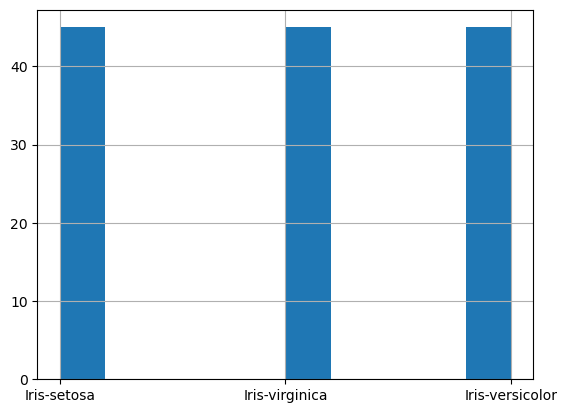

In [98]:
train_data['species'].hist()

In [99]:
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [100]:
y = train_data['species']
y

0          Iris-setosa
1       Iris-virginica
2          Iris-setosa
3       Iris-virginica
4          Iris-setosa
            ...       
130    Iris-versicolor
131    Iris-versicolor
132        Iris-setosa
133        Iris-setosa
134        Iris-setosa
Name: species, Length: 135, dtype: object

In [101]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

preproc = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(sparse=False), [0])],
                           remainder='passthrough')
y = preproc.fit_transform(y.values.reshape(-1, 1))

X = train_data.drop('species', axis=1).values
y

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1

In [102]:
preproc.named_transformers_['OneHot'].inverse_transform(y)

array([['Iris-setosa'],
       ['Iris-virginica'],
       ['Iris-setosa'],
       ['Iris-virginica'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-virginica'],
       ['Iris-setosa'],
       ['Iris-versicolor'],
       ['Iris-setosa'],
       ['Iris-versicolor'],
       ['Iris-virginica'],
       ['Iris-versicolor'],
       ['Iris-virginica'],
       ['Iris-setosa'],
       ['Iris-versicolor'],
       ['Iris-setosa'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-setosa'],
       ['Iris-virginica'],
       ['Iris-versicolor'],
       ['Iris-virginica'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-virginica'],
       ['Iris-setosa'],
       ['Iris-virginica'],
       ['Iris-setosa'],
       ['Iris-virginica'],
       ['Iris-virginica'],
       ['Iris-versicolor'],
       ['Iris-setosa'],
       ['Iris-versicolor'],
   

In [91]:
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### Model
Implement any appropriate ML model you like. 


In [92]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors':list(range(1, 11)),
              'weights':['uniform', 'distance'],
              'metric':['euclidean', 'manhattan', 'chebyshev', 'cosine']}

model = GridSearchCV(estimator=KNeighborsClassifier(), cv=7, scoring='accuracy', param_grid=params)

model.fit(X, y)

print("Best parameters:", model.best_params_)

Best parameters: {'metric': 'cosine', 'n_neighbors': 1, 'weights': 'uniform'}


### Inference
Run you trained model on `test` split


In [93]:
test_data = pd.read_csv('dataset/test.csv')
test_data.head()

(15, 5)


In [94]:
predictions = model.predict(test_data.values)
predictions

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [116]:
tmp = preproc.named_transformers_['OneHot'].inverse_transform(predictions)
tmp

array(['Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa'], dtype=object)

### Save model predictions
Save model predictions to `submission.csv` and submit to competition

In [114]:
preds = pd.DataFrame(columns=['id', 'species'])
preds['id'] = test_data['id']
preds
preds['species'] = tmp.ravel()

In [115]:
preds.to_csv('submission.csv', index=None)